In [25]:
#
import torch.utils.data as data
import torchvision.transforms as T
import numpy as np

#
from matplotlib import cm as cm
import matplotlib.pyplot as plt
import PIL.Image as Image
import os
import h5py
import scipy
from scipy.io import loadmat

In [26]:
# 
index = 5
path_image = f"./ShanghaiTech/part_A/train_data/images/IMG_{index}.jpg"
path_h5 =  f"./ShanghaiTech/part_A/train_data/ground-truth-h5/IMG_{index}.h5"
path_mat = f"./ShanghaiTech/part_A/train_data/ground-truth/GT_IMG_{index}.mat"

In [27]:
image_size = 256
transforms = T.Compose(
                [
                    # TODO: Resize or RandomResizeCrop
                    T.Resize((image_size, image_size)),
                    T.ToTensor(),
                ]
            )

In [28]:
# Load original image
image = Image.open(path_image)
image.show()

In [29]:
densityMap = h5py.File(path_h5, "r")["density"]
densityMap = np.asarray(densityMap)
densityMap = Image.fromarray(densityMap)


(eog:39086): Gtk-WARNING **: 16:00:24.614: cannot open display: 


In [30]:
#
image = transforms(image)
if image.shape[0] == 1:     # Deal with the case when input image is gray scale
    image = image.repeat(3, 1, 1)

#
densityMap = transforms(densityMap)

In [31]:
densityMap.shape

torch.Size([1, 256, 256])

0.0 0.1084927


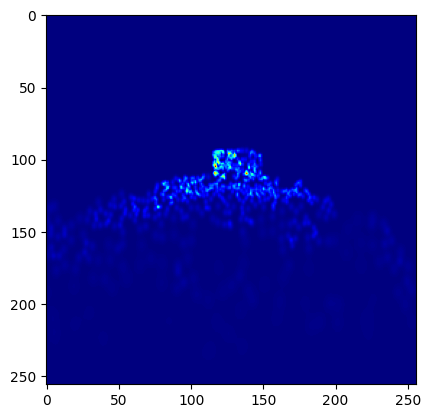

In [32]:
# 
densityMap = densityMap.cpu().numpy()
densityMap = densityMap[0]
print(np.min(densityMap), np.max(densityMap))

#
plt.imshow(densityMap, cmap=cm.jet)
# plt.savefig('densityMap.png')